In [1]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

/home/vignesh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
data = pd.read_csv('/home/vignesh/Downloads/bank-additional/bank-additional/bank-additional-full.csv',sep=';')

In [8]:
data[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
remove_999 = data[data['pdays']!=999]

In [40]:
clf = IsolationForest(max_samples=100)
pred = clf.fit(remove_999[['age','pdays']]).predict(remove_999[['age','pdays']])

/home/vignesh/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [41]:
remove_999['pred'] = pred

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


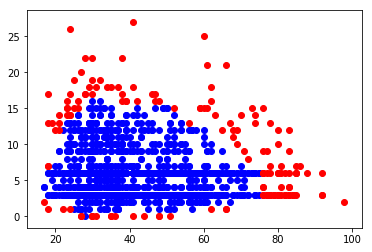

In [46]:
axes = plt.subplot()
axes.scatter(remove_999[remove_999['pred']==1]['age'],remove_999[remove_999['pred']==1]['pdays'],c='blue')
axes.scatter(remove_999[remove_999['pred']==-1]['age'],remove_999[remove_999['pred']==-1]['pdays'],c='red')

In [44]:
remove_999[remove_999['pred']==1]['age']

24108    37
24264    48
24279    42
24397    50
24482    36
24613    32
24799    31
24850    51
24910    52
25053    31
25274    34
25293    41
25454    49
25504    35
25519    58
25703    32
25853    31
25872    54
26104    39
26166    34
26168    35
26194    31
26197    42
26243    56
26368    35
26549    58
26748    35
26972    36
27050    49
27373    52
         ..
41083    24
41085    51
41086    50
41089    50
41090    31
41092    31
41097    34
41098    29
41099    59
41100    33
41101    63
41108    64
41109    34
41110    34
41113    34
41114    60
41117    29
41124    37
41132    41
41133    28
41136    54
41143    29
41151    41
41153    67
41159    35
41162    60
41163    35
41164    54
41178    62
41182    29
Name: age, Length: 1362, dtype: int64